# Data process and visualize using jupyter book

## Introduction

  Today i will follow insturction from [Interactive Data Analysis with FigureWidget ipywidgets in Python](https://plotly.com/python/figurewidget-app/) to develop a form with HKGov's database.

---
## Importing libararies

In [1]:
import datetime
import numpy as np
import pandas as pd
import requests

import plotly.graph_objects as go
from ipywidgets import widgets

---
## Downloading material to process
We will download school list data from HKGov: [School Location and Information](https://data.gov.hk/en-data/dataset/hk-edb-schinfo-school-location-and-information) which contains he names, addresses, coordinates and other relevant information of government, private, aided, Direct Subsidy Scheme, English Schools Foundation and international schools, kindergartens and kindergartens cum-child care centre (as at 28 December 2021). For precise, the file link is: [http://www.edb.gov.hk/attachment/en/student-parents/sch-info/sch-search/sch-location-info/SCH_LOC_EDB.xlsx](http://www.edb.gov.hk/attachment/en/student-parents/sch-info/sch-search/sch-location-info/SCH_LOC_EDB.xlsx)

We will use this file as our raw data and visualize it.

In [2]:
url = 'http://www.edb.gov.hk/attachment/en/student-parents/sch-info/sch-search/sch-location-info/SCH_LOC_EDB.xlsx'
r = requests.get(url, allow_redirects=True)
open('schools.xlsx', 'wb').write(r.content)

df = pd.read_excel('schools.xlsx')
df = df.drop(df.columns[[0]], axis=1)

df.sample(2)

,ENGLISH CATEGORY,中文類別,ENGLISH NAME,中文名稱,ENGLISH ADDRESS,中文地址,LONGITUDE,經度,LATITUDE,緯度,...,SCHOOL LEVEL,學校類型,TELEPHONE,聯絡電話,FAX NUMBER,傳真號碼,WEBSITE,網頁,RELIGION,宗教
833,Aided Special Schools,資助特殊學校,SAHK JOCKEY CLUB ELAINE FIELD SCHOOL (SECONDAR...,香港耀能協會賽馬會田綺玲學校(中學部),1 FU CHUNG LANE TAI PO NEW TERRITORIES,新界大埔富忠里1號,114.172881,114.172881,22.456989,22.456989,...,SECONDARY,中學,23489506,23489506,23402657,23402657,http://www.jcefs.edu.hk,http://www.jcefs.edu.hk,NOT APPLICABLE,不適用
3623,Private Secondary Schools (Day/Evening),私立中學（日校/夜校）,INTERNATIONAL CHRISTIAN QUALITY MUSIC SECONDAR...,國際基督教優質音樂中學暨小學,182 PO KONG VILLAGE ROAD DIAMOND HILL KOWLOON ...,九龍鑽石山蒲崗村道１８２號（包括６樓）,114.205464,114.205464,22.345225,22.345225,...,SECONDARY,中學,27773828,27773828,27773899,27773899,http://www.icqm.edu.hk,http://www.icqm.edu.hk,PROTESTANTISM / CHRISTIANITY,基督教


---
## Find how many types of school is in HK
To do it, we can use unique() to find out unique item in array.
### Category

In [3]:
schoolTypes = []
chiSchoolTypes = df['ENGLISH CATEGORY'].unique()
for i in range(len(chiSchoolTypes)):
	schoolTypes.append(chiSchoolTypes[i])

tempTable = pd.DataFrame(schoolTypes)
tempTable.columns=['類別']
display(tempTable)

,類別
0,Aided Primary Schools
1,Aided Secondary Schools
2,Aided Special Schools
3,Caput Secondary Schools
4,Direct Subsidy Scheme Primary Schools
5,Direct Subsidy Scheme Secondary Schools
6,English Schools Foundation (Primary)
7,English Schools Foundation (Secondary)
8,Government Primary Schools
9,Government Secondary Schools


### Student Gender

In [4]:
genders = []
chiGenders = df['STUDENTS GENDER'].unique()
for i in range(len(chiGenders)):
	genders.append(chiGenders[i])
	
tempTable = pd.DataFrame(genders)
tempTable.columns=['就讀學生性別']
display(tempTable)

,就讀學生性別
0,GIRLS
1,CO-ED
2,BOYS


### Religion

In [5]:
religions = []
chiReligion = df['RELIGION'].unique()
for i in range(len(chiReligion)):
	religions.append(chiReligion[i])
	
tempTable = pd.DataFrame(religions)
tempTable.columns=['宗教']
display(tempTable)

,宗教
0,CATHOLICISM
1,PROTESTANTISM / CHRISTIANITY
2,NOT APPLICABLE
3,N.A.
4,BUDDHISM
5,TAOISM
6,"CONFUCIANISM,BUDDHISM & TAOISM"
7,ISLAM
8,NaN
9,CONFUCIANISM


---

## Print out value for each data in tab

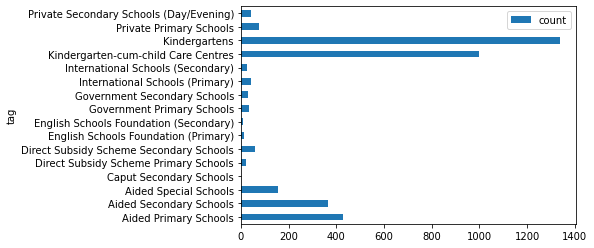

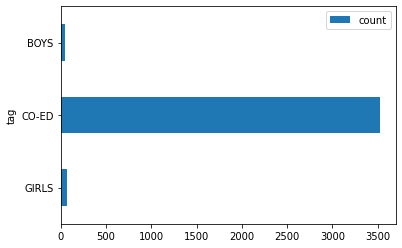

In [6]:
def setup_ui(df):
    
    out = widgets.Output()
    with out:
        display(df)
        display(df.plot.barh(x='tag'))
    return out

data = []
row_count = len(df.index)
for i in range(row_count):
  data.append([])
  for item in df.loc[i]:
    data[i].append(item)
ax = []
ay = []
for schoolType in schoolTypes:
  ax.append(schoolType)
  ay.append(0)
  for row in data:
    if(row[0] == schoolType):
      ay[len(ay)-1] += 1
schoolTypeDF = pd.DataFrame({'tag':ax, 'count':ay})

ax = []
ay = []
for gender in genders:
  ax.append(gender)
  ay.append(0)
  for row in data:
    if(row[14] == gender):
      ay[len(ay)-1] += 1
genderDF = pd.DataFrame({'tag':ax, 'count':ay})

tab_contents = ['School Type', 'Student gender']
children = [setup_ui(schoolTypeDF), setup_ui(genderDF)]
tab = widgets.Tab()
tab.children = children
tab.titles = tab_contents
tab